In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_pickle('./dataset/나혼자FIFA_사전정리.pkl')
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,65,Atlético Huila,61750.0,1759,Left,1.0,3.0,2.0,6,Normal,0,LB,24.0,"Aug 7, 2018",0,2023,175.0,78,59,59,59,60,59,59,59,60,59,59,59,63,60,60,60,63,65,64,64,64,65,65,64,64,64,65,62.0,45.0,60.0,62.0,38.0,58.0,64.0,66.0,59.0,60.0,75.0,76.0,67.0,63.0,61.0,66.0,63.0,77.0,74.0,32.0,68.0,61.0,50.0,57.0,49.0,52.0,60.0,60.0,58.0,12.0,16.0,15.0,9.0,16.0

# 컬럼 이름을 입력하면
# Wage, LogWage와의 관계를 그래프로 보여주는 함수

In [3]:
def graph(x):
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    sns.regplot(data=df, x=x, y='Wage', fit_reg=True, ax=ax1)
    sns.regplot(data=df, x=x, y='LogWage', fit_reg=True, ax=ax2)
    
    sns.barplot(data=df, x=x,y='Wage',ax=ax3)
    sns.barplot(data=df, x=x,y='LogWage',ax=ax4)

# 가중치 계산하기 

- Median으로 알아보는 것이 정규성이 없는 Wage를 알아보는 좋은 방법이라고 생각.

# Age 가중치

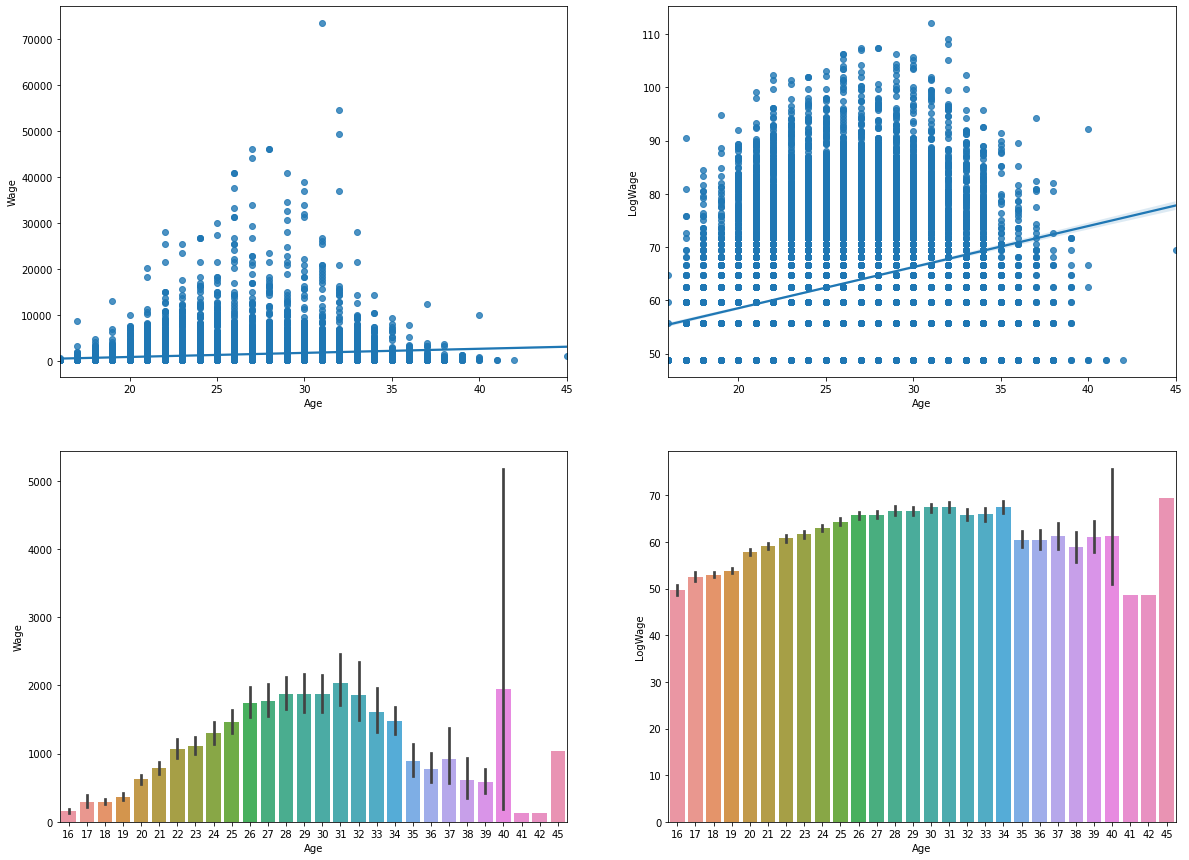

In [4]:
graph('Age')

## 30.5살을 전성기로 판단하여
## 그 좌우로 갈 수록 가중치가 적어지도록 했다.

In [5]:
df['AgeWeight'] = np.round(1/(df.Age-30.5)**2,3)
df.AgeWeight

0        4.000
1        0.444
2        0.444
3        0.160
4        0.160
         ...  
14319    0.033
14320    0.024
14321    0.006
14322    0.009
14323    0.006
Name: AgeWeight, Length: 14324, dtype: float64

In [6]:
np.sort(df.AgeWeight.unique())

array([0.005, 0.006, 0.008, 0.009, 0.011, 0.014, 0.018, 0.024, 0.033,
       0.049, 0.082, 0.16 , 0.444, 4.   ])

- 4: 30, 31세
- 0.444: 29, 32세
- 0.16: 28, 33세
- 0.082: 27, 34세
- 0.049: 26, 35세
- 0.033: 25, 36세
- 0.024: 24, 37세
- 0.018: 23, 38세
- 0.014: 22, 39세
- 0.011: 21, 40세
- 0.009: 20, 41
- 0.008: 19, 42세
- 0.006: 18, 45세
- 0.005: 17세

# 카테고리화 하자.

- Age로 가중치를 준다면...아직은 쉽 게 결정할 일은 아니지만

- 알아보기 쉽도록 14개 구간을 1~14로 이름만이라도 바꾸겠다.

- 높을 수록 좋다.

In [7]:
# Age 변환

def change_value_from(x):
    out = ''
    if x==4: out = 14
    elif x==0.444: out = 13
    elif x==0.16: out = 12
    elif x==0.082: out = 11
    elif x==0.049: out = 10
    elif x==0.033: out = 9
    elif x==0.024: out = 8
    elif x==0.018: out = 7
    elif x==0.014: out = 6
    elif x==0.011: out = 5
    elif x==0.009: out = 4
    elif x==0.008: out = 3
    elif x==0.006: out = 2
    elif x==0.005: out = 1
    return int(out)

df.AgeWeight = df.AgeWeight.apply(lambda x: change_value_from(x))
df.AgeWeight

0        14
1        13
2        13
3        12
4        12
         ..
14319     9
14320     8
14321     2
14322     4
14323     2
Name: AgeWeight, Length: 14324, dtype: int64

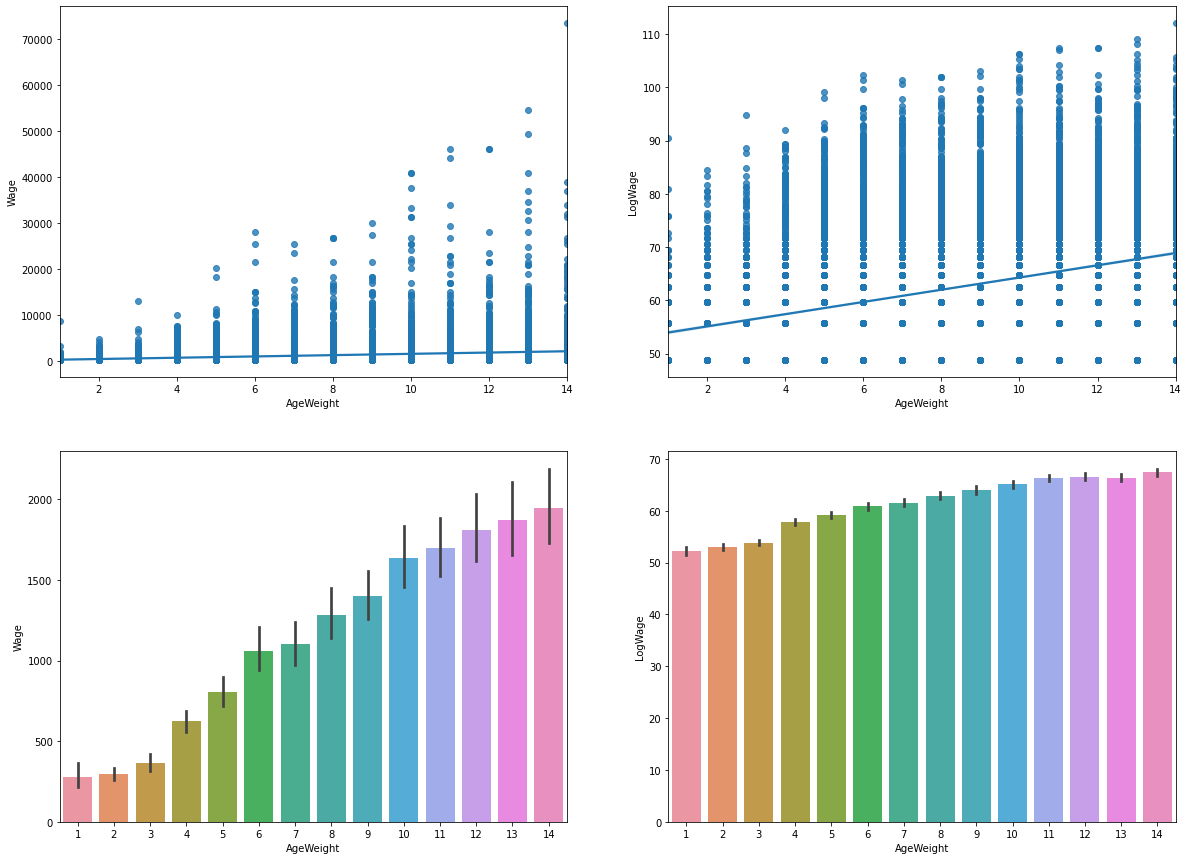

In [8]:
graph('AgeWeight')

In [9]:
# 카테고리화보단 가중치로 바꾸는 것이 훨씬 좋겠다.

In [10]:
b = []
for i in range(1,15):
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.AgeWeight==i].LogWage.median()))
    print('===================')
    a = int(df[df.AgeWeight==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round((b/b[0]),3)
print('계산한 가중치')
print(b)

1의 중앙 Wage
48
2의 중앙 Wage
48
3의 중앙 Wage
48
4의 중앙 Wage
55
5의 중앙 Wage
55
6의 중앙 Wage
59
7의 중앙 Wage
59
8의 중앙 Wage
59
9의 중앙 Wage
62
10의 중앙 Wage
62
11의 중앙 Wage
64
12의 중앙 Wage
64
13의 중앙 Wage
64
14의 중앙 Wage
66
[48, 48, 48, 55, 55, 59, 59, 59, 62, 62, 64, 64, 64, 66]
계산한 가중치
[1.    1.    1.    1.146 1.146 1.229 1.229 1.229 1.292 1.292 1.333 1.333
 1.333 1.375]


In [11]:
# Age 변환

def change_value_from(x):
    out = ''
    if x==14: out = 1.375
    elif x==13: out = 1.333
    elif x==12: out = 1.333
    elif x==11: out = 1.333
    elif x==10: out = 1.292
    elif x==9: out = 1.292
    elif x==8: out = 1.229
    elif x==7: out = 1.229
    elif x==6: out = 1.229
    elif x==5: out = 1.146
    elif x==4: out = 1.146
    elif x==3: out = 1
    elif x==2: out = 1
    elif x==1: out = 1
    return float(out)

df['AgeWeight'] = df.AgeWeight.apply(lambda x: change_value_from(x))
df.AgeWeight

0        1.375
1        1.333
2        1.333
3        1.333
4        1.333
         ...  
14319    1.292
14320    1.229
14321    1.000
14322    1.146
14323    1.000
Name: AgeWeight, Length: 14324, dtype: float64

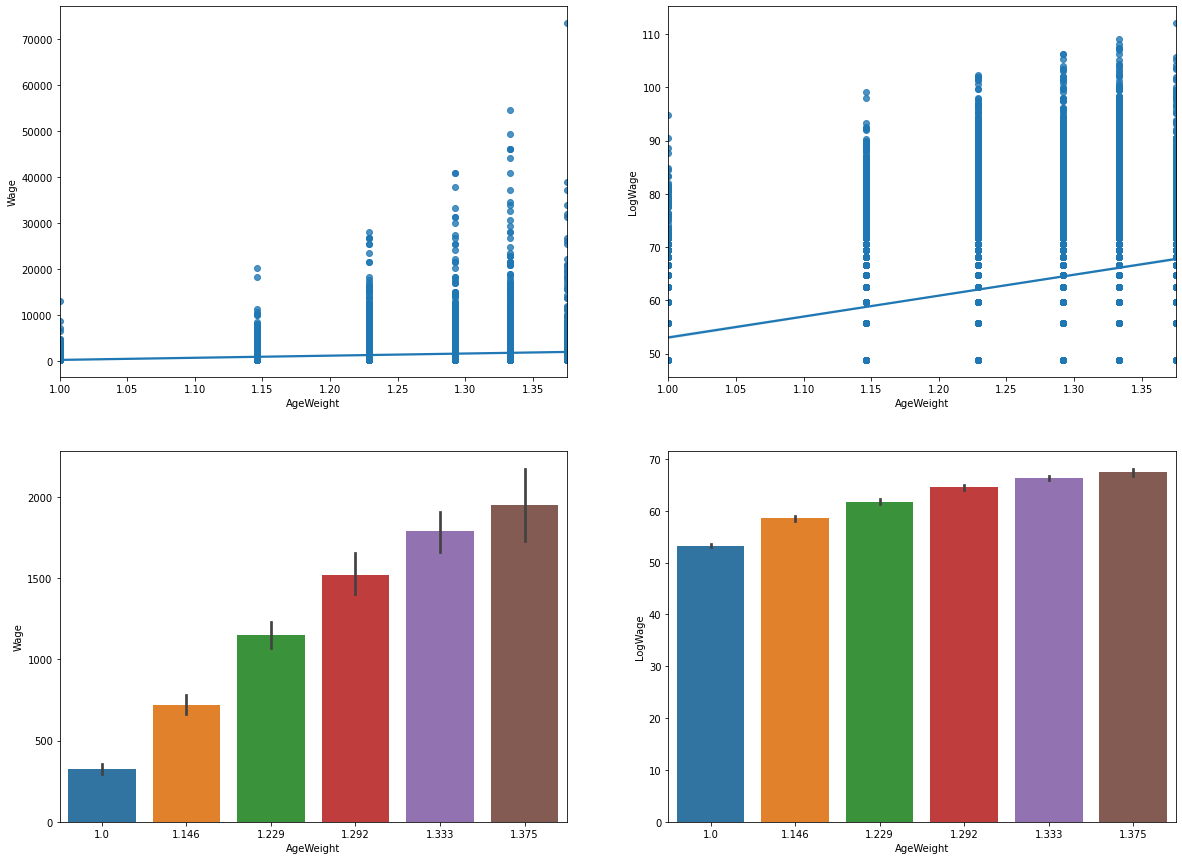

In [12]:
graph('AgeWeight')

# 로그로 확인하니 선형성이 많이 증가했다.

# InternationalReputation 가중치

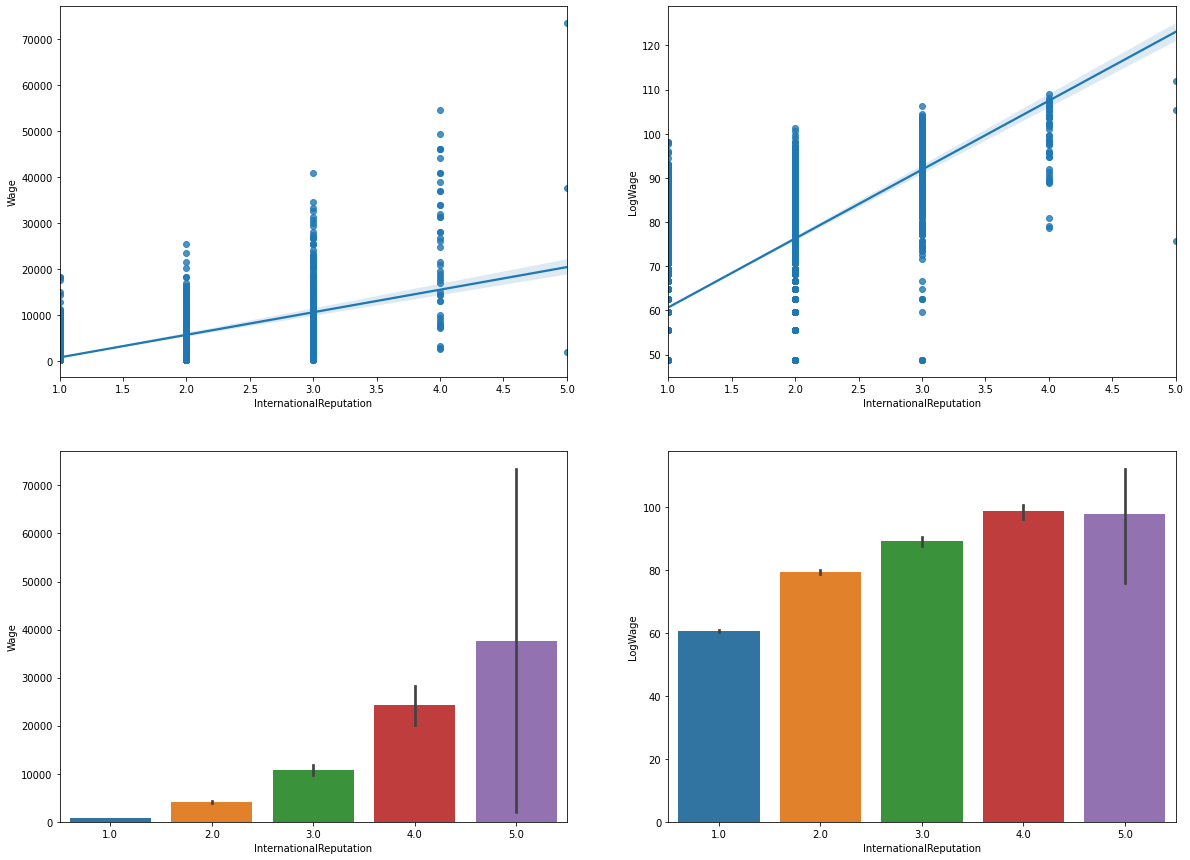

In [13]:
graph('InternationalReputation')

5의 경우에는 편차가 무진장 커서 반영을 하는 건 도박에 가깝다...

1은 편차도 적고 아주 좋다.

2,3,4의 효과가 젤 크게 끔 해야한다.

1과 대비해서 2,3,4가 얼마나 차이가 있는지 알아보자.

In [14]:
b = []
for i in range(5):
    i = i+1
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.InternationalReputation==i].LogWage.median()))
    print('===================')
    a = int(df[df.InternationalReputation==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round((b/b[0]),2)
print('계산한 가중치')
print(b)

1의 중앙 Wage
59
2의 중앙 Wage
80
3의 중앙 Wage
91
4의 중앙 Wage
99
5의 중앙 Wage
105
[59, 80, 91, 99, 105]
계산한 가중치
[1.   1.36 1.54 1.68 1.78]


In [15]:
def change(x):
    cat = ''
    if x == 1: cat = 1
    elif x == 2: cat = 1.36
    elif x == 3: cat = 1.54
    elif x == 4: cat = 1.68
    elif x == 5: cat = 1.78
    return float(cat)

df['InternationalReputationWeight'] = df.InternationalReputation.apply(lambda x: change(x))

In [16]:
df.InternationalReputationWeight

0        1.78
1        1.68
2        1.68
3        1.68
4        1.68
         ... 
14319    1.00
14320    1.00
14321    1.00
14322    1.00
14323    1.00
Name: InternationalReputationWeight, Length: 14324, dtype: float64

# RealFace 가중치

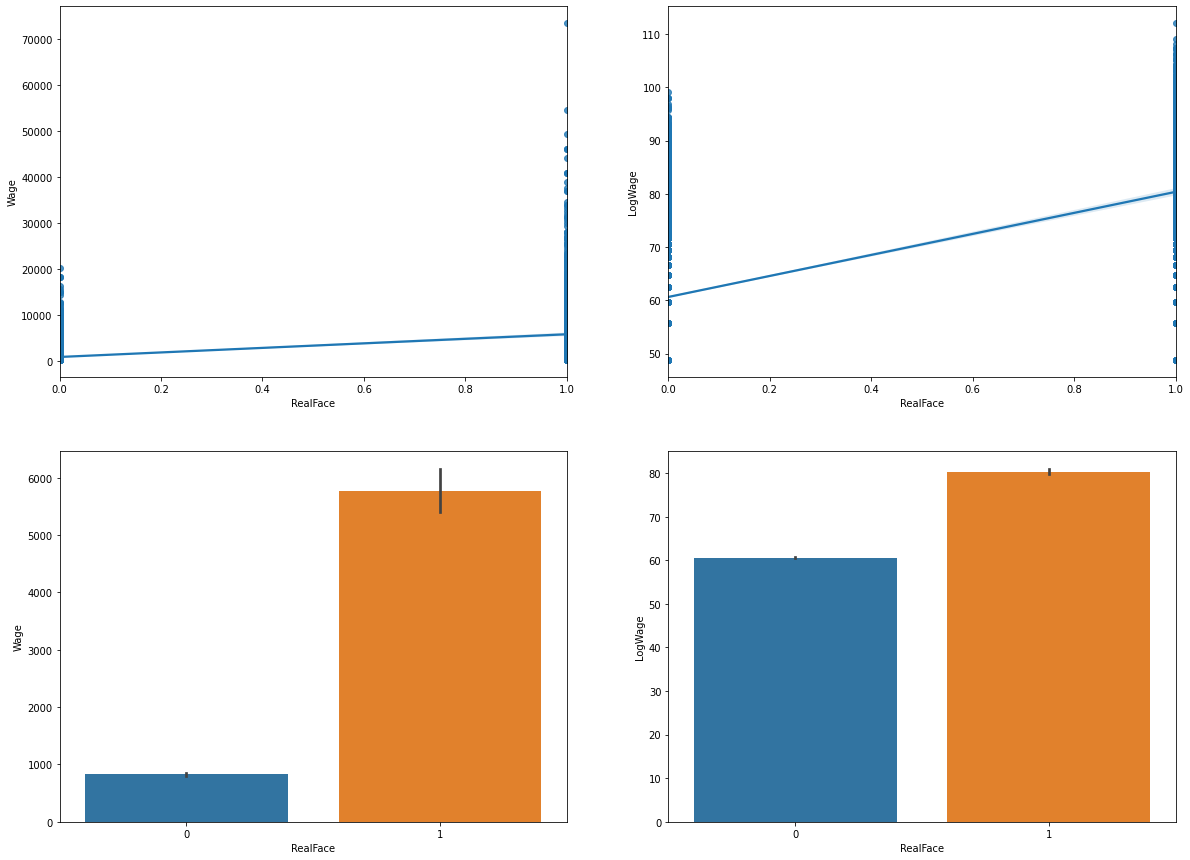

In [17]:
graph('RealFace')

In [18]:
df.RealFace

0        1
1        1
2        1
3        1
4        1
        ..
14319    0
14320    0
14321    0
14322    0
14323    0
Name: RealFace, Length: 14324, dtype: int32

(array([13000.,  1324.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

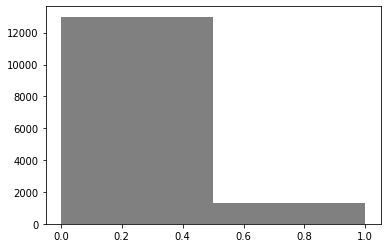

In [19]:
plt.hist(df.RealFace,bins=2,color='grey')

In [20]:
df[df.RealFace==1].LogWage.median()

82.17554572716895

In [21]:
df[df.RealFace==0].LogWage.median()

59.68707559985366

In [22]:
RealFaceWeight = np.round(df[df.RealFace==1].LogWage.median()/ \
                          df[df.RealFace==0].LogWage.median(),2)
print('계산한 가중치')
RealFaceWeight

계산한 가중치


1.38

In [23]:
def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.38
    return cat

df['RealFaceWeight'] = df.RealFace.apply(lambda x: change(x))

In [24]:
df.RealFaceWeight

0        1.38
1        1.38
2        1.38
3        1.38
4        1.38
         ... 
14319    1.00
14320    1.00
14321    1.00
14322    1.00
14323    1.00
Name: RealFaceWeight, Length: 14324, dtype: float64

# PositionClass 가중치

- 로그변환하고 보니 큰 상관은 없는 듯...

<AxesSubplot:xlabel='PositionClass', ylabel='LogWage'>

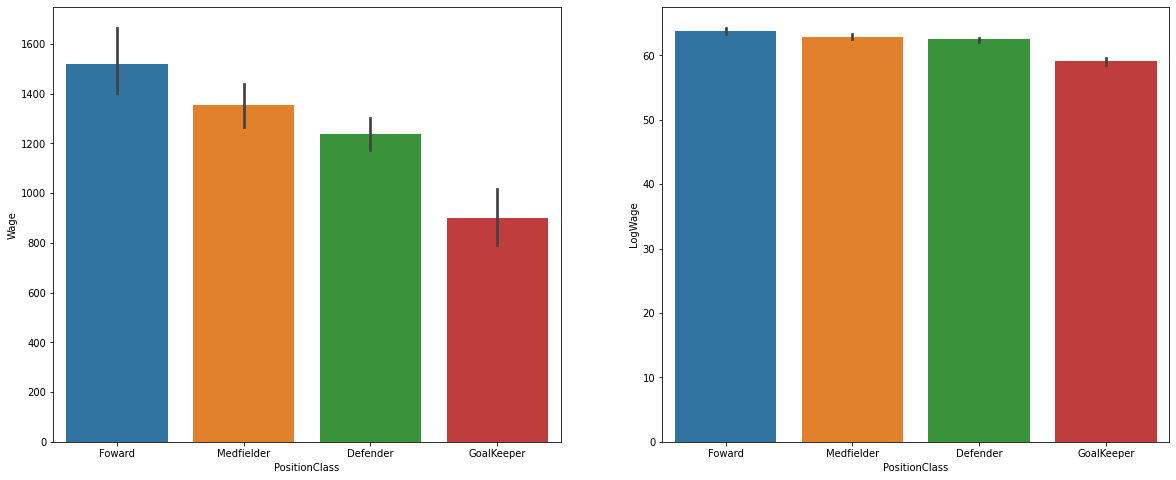

In [25]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(data=df, x='PositionClass', y='Wage',ax=ax1)
sns.barplot(data=df, x='PositionClass', y='LogWage',ax=ax2)

(array([2649., 4287., 5807., 1581.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

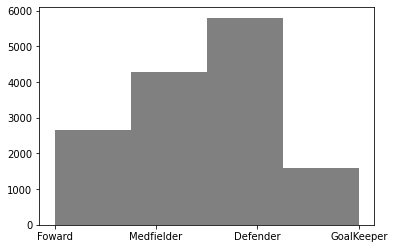

In [26]:
plt.hist(df.PositionClass,bins=4,color='grey')

In [27]:
df.PositionClass.unique().tolist()

['Foward', 'Medfielder', 'Defender', 'GoalKeeper']

In [28]:
for i in df.PositionClass.unique().tolist():
    print(np.round(df[df.PositionClass==i].LogWage.median(),3))

62.558
59.687
59.687
55.645


In [29]:
b = []
for i in df.PositionClass.unique().tolist():
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.PositionClass==i].LogWage.median()))
    print('===================')
    a = int(df[df.PositionClass==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round(b[::-1]/b[-1],2)
print('계산한 가중치')
print(b)

Foward의 중앙 Wage
62
Medfielder의 중앙 Wage
59
Defender의 중앙 Wage
59
GoalKeeper의 중앙 Wage
55
[62, 59, 59, 55]
계산한 가중치
[1.   1.07 1.07 1.13]


In [30]:
def change(x):
    cat = ''
    if x == 'GoalKeeper': cat = 1
    elif x == 'Defender': cat = 1.07
    elif x == 'Medfielder': cat = 1.07
    elif x == 'Foward': cat = 1.13
    return cat

df['PositionClassWeight'] = df.PositionClass.apply(lambda x: change(x))

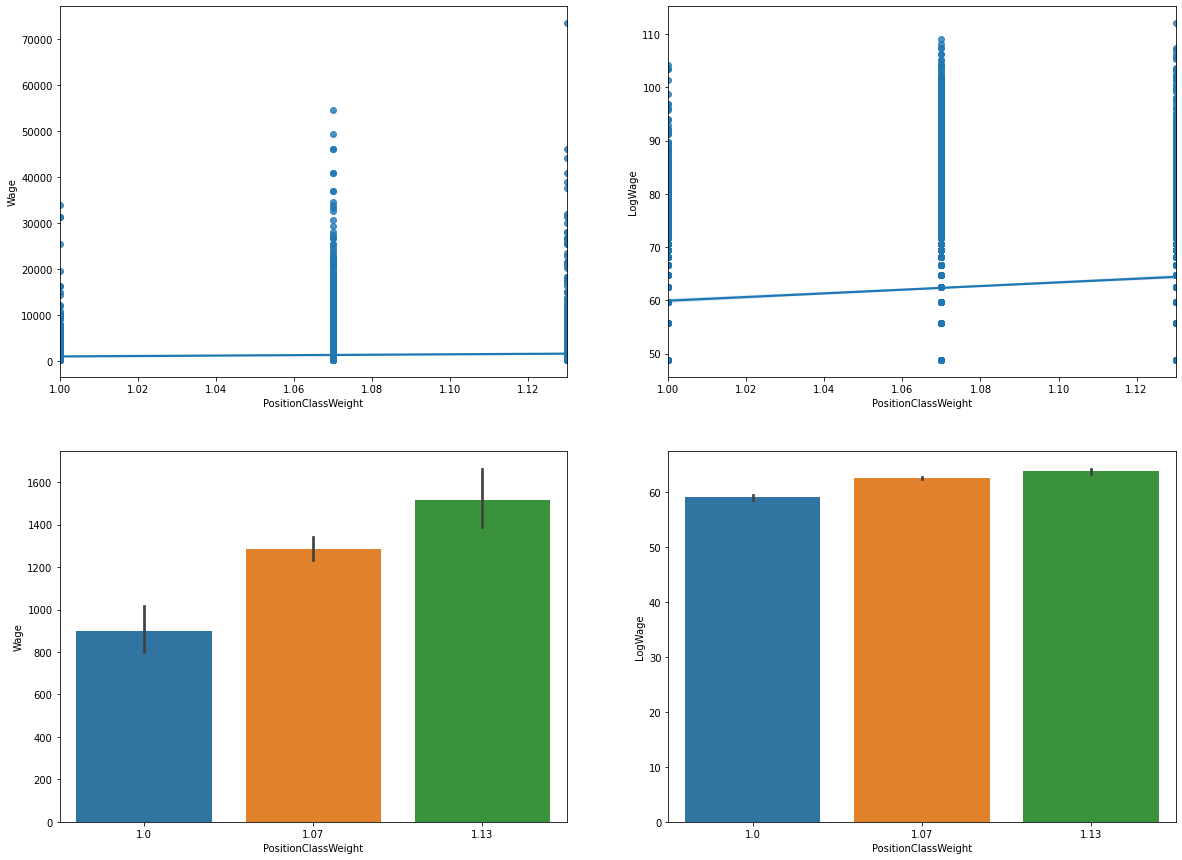

In [31]:
graph('PositionClassWeight')

In [32]:
# 포지션 클래스는 0,1,2,3 으로 원핫인코딩 하자.

def change(x):
    cat = ''
    if x == 'GoalKeeper': cat = 0
    elif x == 'Defender': cat = 1
    elif x == 'Medfielder': cat = 2
    elif x == 'Foward': cat = 3
    return cat

df['PositionClass1'] = df.PositionClass.apply(lambda x: change(x))

# LoanedFrom 가중치

- 고액 팀에 RealFace가 있다면
- 저가 팀엔 LoanedFrom이 있다!

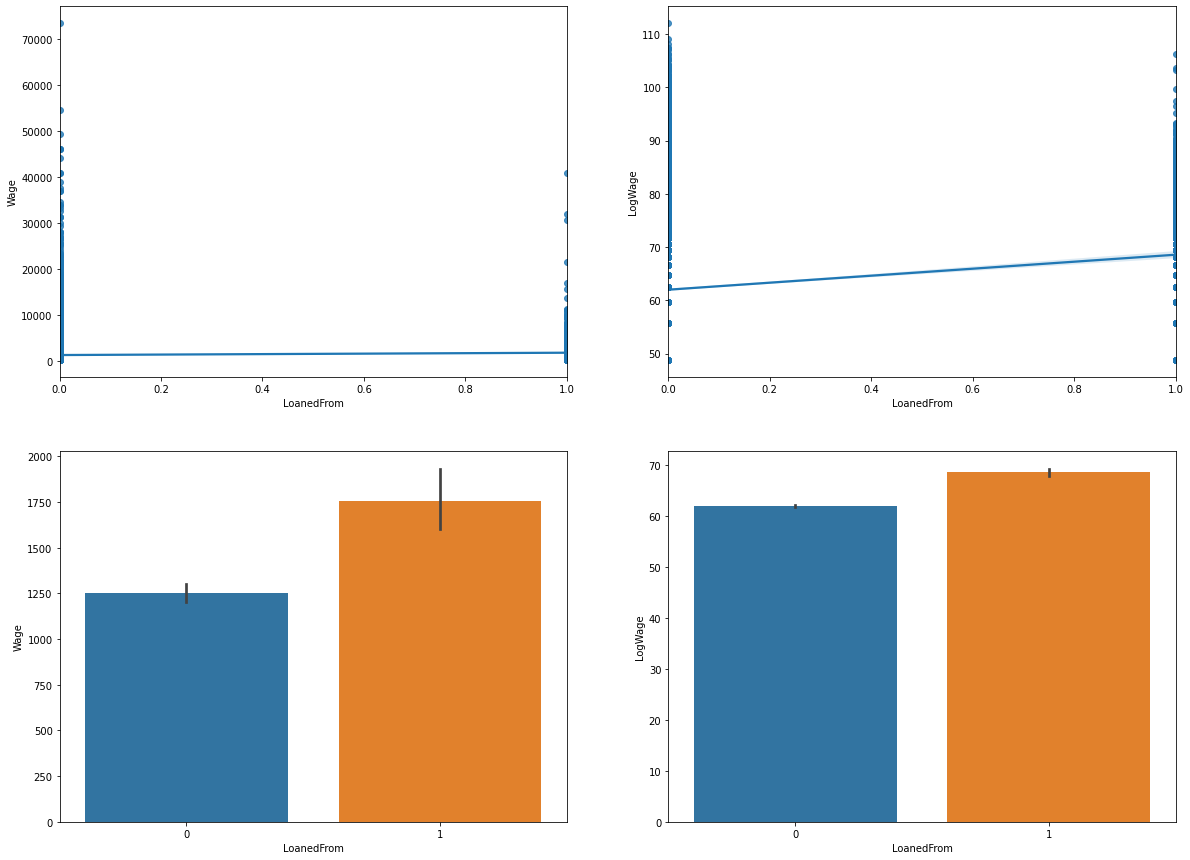

In [33]:
graph('LoanedFrom')

- LoanedFrom은 하위에 몰려있기 때문에 하위에서만 확인해 보겠다.

In [34]:
under4000 = df[df['LogWage']<3500]

<AxesSubplot:xlabel='LoanedFrom', ylabel='LogWage'>

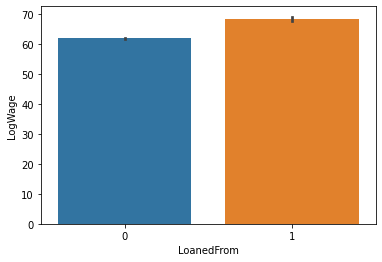

In [35]:
sns.barplot(data=under4000, x='LoanedFrom',y='LogWage')

# 차이가 좀 커졌다.

In [36]:
b = []
for i in df.LoanedFrom.unique().tolist():
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.LoanedFrom==i].LogWage.median()))
    print('===================')
    a = int(df[df.LoanedFrom==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round(b/b[0],2)
print('계산한 가중치')
print(b)

0의 중앙 Wage
59
1의 중앙 Wage
68
[59, 68]
계산한 가중치
[1.   1.15]


In [37]:
df['LoanedFromWeight']=1

In [38]:
def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.15
    return cat

df['LoanedFromWeight'] = df.LoanedFrom.apply(lambda x: change(x))

In [39]:
df.LoanedFromWeight.unique()

array([1.  , 1.15])

In [40]:
np.sort(df.Value.unique())

array([1.3000e+03, 2.6000e+03, 3.9000e+03, 5.2000e+03, 6.5000e+03,
       7.8000e+03, 9.1000e+03, 1.0400e+04, 1.1700e+04, 1.3000e+04,
       1.4300e+04, 1.5600e+04, 1.6900e+04, 1.8200e+04, 1.9500e+04,
       2.0800e+04, 2.2100e+04, 2.3400e+04, 2.4700e+04, 2.6000e+04,
       2.7300e+04, 2.8600e+04, 2.9900e+04, 3.1200e+04, 3.2500e+04,
       3.3800e+04, 3.5100e+04, 3.6400e+04, 3.7700e+04, 3.9000e+04,
       4.2250e+04, 4.5500e+04, 4.8750e+04, 5.2000e+04, 5.5250e+04,
       5.8500e+04, 6.1750e+04, 6.5000e+04, 6.8250e+04, 7.1500e+04,
       7.4750e+04, 7.8000e+04, 8.1250e+04, 8.4500e+04, 8.7750e+04,
       9.1000e+04, 9.4250e+04, 9.7500e+04, 1.0075e+05, 1.0400e+05,
       1.0725e+05, 1.1050e+05, 1.1375e+05, 1.1700e+05, 1.2025e+05,
       1.2350e+05, 1.2675e+05, 1.3000e+05, 1.4300e+05, 1.5600e+05,
       1.6900e+05, 1.8200e+05, 1.9500e+05, 2.0800e+05, 2.2100e+05,
       2.3400e+05, 2.4700e+05, 2.6000e+05, 2.7300e+05, 2.8600e+05,
       2.9900e+05, 3.1200e+05, 3.2500e+05, 3.3800e+05, 3.5100e

# 능력치 컬럼들의 상관관계를 확인하여

# 하나의 컬럼인 Total을 만들어보자.

In [41]:
df.columns

Index(['Wage', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Special',
       ...
       'ClubWageMedian', 'ClubLogWageMedian', 'ClubWageMin', 'ClubLogWageMin',
       'AgeWeight', 'InternationalReputationWeight', 'RealFaceWeight',
       'PositionClassWeight', 'PositionClass1', 'LoanedFromWeight'],
      dtype='object', length=101)

<AxesSubplot:>

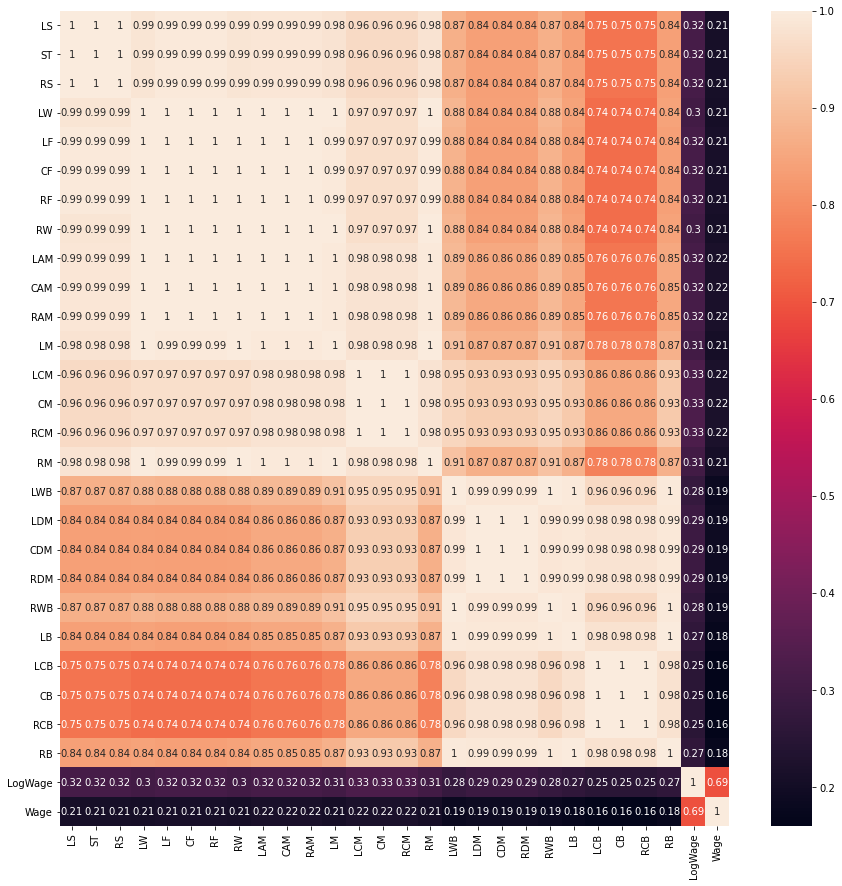

In [42]:
# 히트맵으로 알아보기
plt.figure(figsize=(15,15))
sns.heatmap(df['LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM \
                RM LWB LDM CDM RDM RWB LB LCB CB RCB RB \
                LogWage Wage'.split()].corr(), annot=True)

# 아무런 상관이 없다.
# 모두 버린다.

<AxesSubplot:>

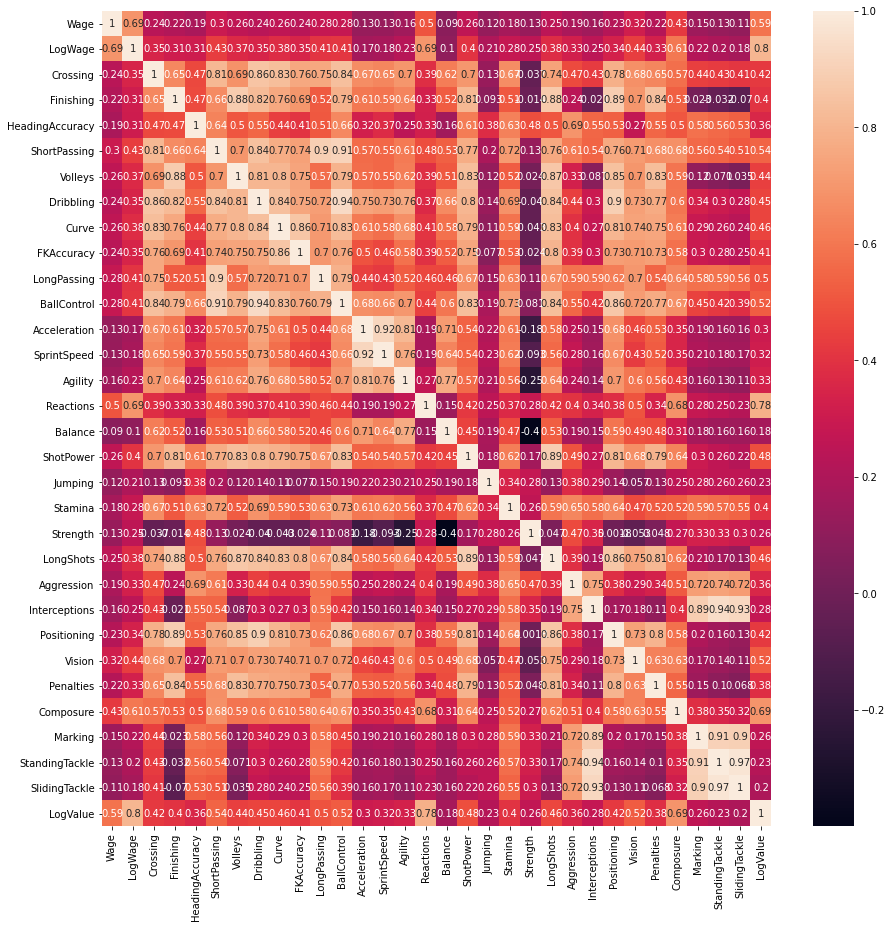

In [43]:
# 히트맵으로 알아보기
plt.figure(figsize=(15,15))
sns.heatmap(df[['Wage', 'LogWage', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'LogValue']].corr(), annot=True)

<AxesSubplot:>

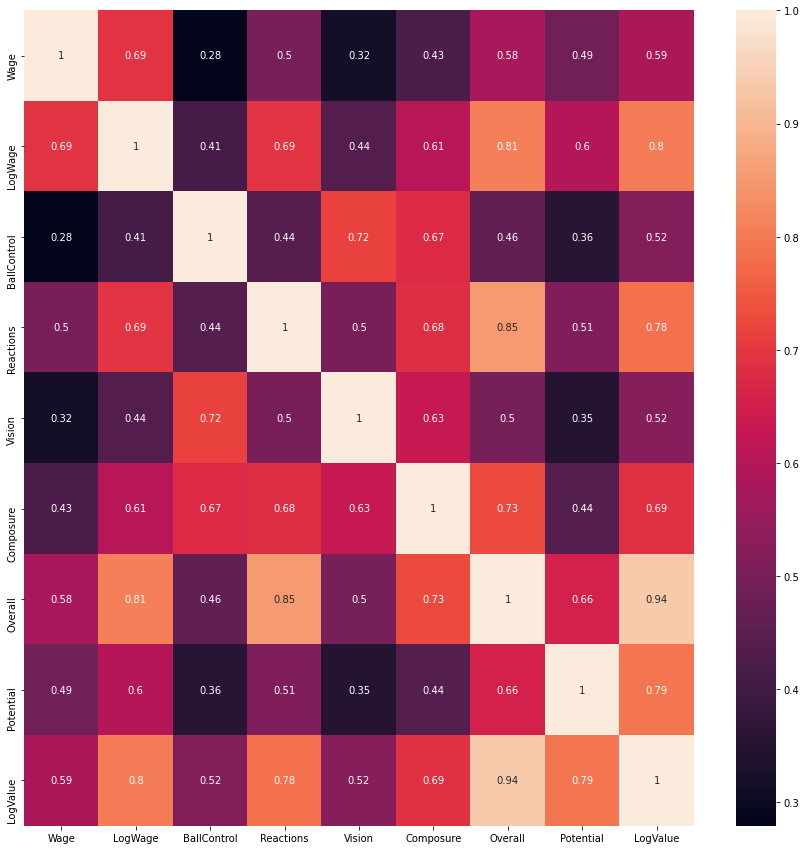

In [44]:
# 좁혀서 보기
plt.figure(figsize=(15,15))
sns.heatmap(df[['Wage', 'LogWage', 'BallControl', 'Reactions',
           'Vision', 'Composure', 'Overall', 'Potential', 'LogValue']].corr(), annot=True)

# 다들 좋다.

# 능력치 컬럼 중 사용할 컬럼

'Reactions', 'Vision', 'Composure', 'Overall', 'Potential', 'LogValue'

- 정규성을 띄는지 확인.
- 다중공선성 확인
- 결정계수를 확인.

3가지를 확인하여 선정.

# 5가지 중 몇 개는 Total이란 컬럼으로 합치자.

(array([ 13.,   0.,   0.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,
         15.,   0.,   0.,  50.,   0.,   0.,  94.,   0., 117., 110.,   0.,
         93., 109., 143., 134., 158., 155., 280., 166., 304., 272., 239.,
        235., 250., 306., 183., 546., 285., 512., 270., 458., 497., 447.,
        598., 355., 458., 612., 345., 270., 349., 487., 188.,  96., 224.,
        246.,  73., 262., 200., 135., 198., 221., 127., 218., 188., 119.,
        130., 152., 126., 280., 103., 204.,  82., 120.,  95.,  84.,  87.,
         61.,  53.,  42.,  35.,  40.,  27.,  26.,  28.,  24.,  17.,  16.,
          7.,  12.,   8.,   8.,  10.,   6.,   6.,   3.,   2.,   1.,   1.,
          2.]),
 array([ 7.17088848,  7.26468162,  7.35847476,  7.45226791,  7.54606105,
         7.63985419,  7.73364734,  7.82744048,  7.92123362,  8.01502676,
         8.10881991,  8.20261305,  8.29640619,  8.39019933,  8.48399248,
         8.57778562,  8.67157876,  8.76537191,  8.85916505,  8.95295819,
         9.04675133,  9.14

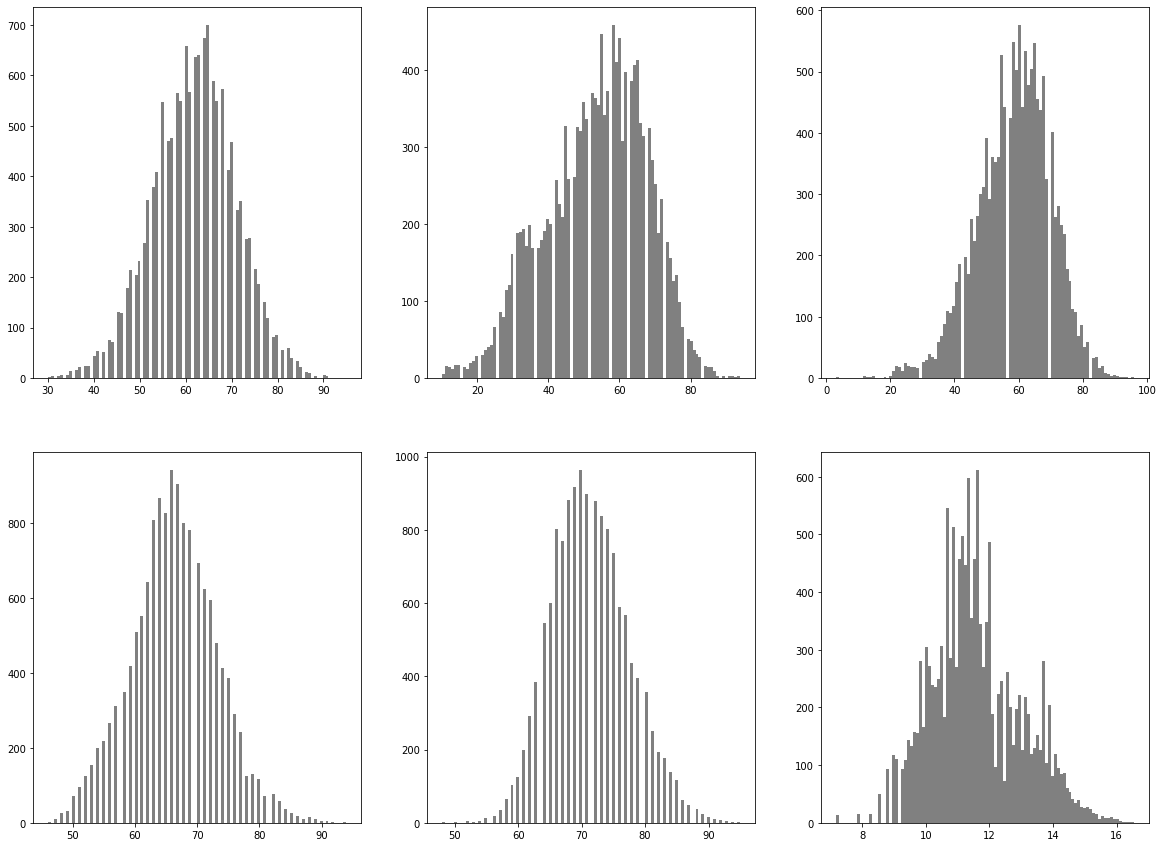

In [45]:
# 정규성 확인

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.hist(df.Reactions,bins=100,color='grey')
ax2.hist(df.Vision,bins=100,color='grey')
ax3.hist(df.Composure,bins=100,color='grey')
ax4.hist(df.Overall,bins=100,color='grey')
ax5.hist(df.Potential,bins=100,color='grey')
ax6.hist(df.LogValue,bins=100,color='grey')

In [46]:
# 어느 정도의 정규성을 다들 갖고 있다고 판단.
# 'Reactions', 'Vision', 'Composure', 'Overall', 'Potential', 'LogValue'
# 다중공선성 확인

In [47]:
formula = 'LogWage ~ Overall + LogValue'
result = smf.ols(formula, df).fit()
result.summary()

# Reactions와 Potential

# Vision과 Potential

# Composure와 Potential

# Overall과 Potential

# 가 다중공선성이 의심된다.

# 모두 Potential 때문이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LogWage   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.450e+04
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:36:36   Log-Likelihood:                -48314.
No. Observations:               14324   AIC:                         9.663e+04
Df Residuals:                   14321   BIC:                         9.666e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.0769      0.583    -49.845      0.000     -30.220     -27.933
Overall        0.7814      0.025     31.699      0.000       0.733       0.830
LogValue       3.4309      0.121     28.283      0.000       3.193       3.669
==============================================================================
Omnibus:                     1105.587   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2106.492
Skew:                          -0.542   Prob(JB):                         0.00
Kurtosis:                       4.534   Cond. No.                         670.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 공부한 결과 다중공선성을 머신러닝에서 걱정할 필요는 없다.

그 이유는 "전통적인 통계"의 목표가 많은 머신 러닝 기술과 다르기 때문입니다.

"전통적인 통계"에 따르면, 회귀와 그 변형을 의미한다고 가정합니다. 회귀 분석에서 우리는 독립 변수가 종속 변수에 미치는 영향을 이해하려고 노력하고 있습니다. 강력한 다중 공선 성이있는 경우 이는 불가능합니다. 이 문제를 해결하는 알고리즘은 없습니다. Studiousness가 수업 출석 및 성적과 관련이있는 경우, 출석 또는 Studiousness로 인해 성적이 실제로 상승하는 원인을 알 수 없습니다.

그러나 예측 정확도에 중점을 둔 머신 러닝 기술에서 우리가 신경 쓰는 것은 변수 세트를 사용하여 다른 세트를 예측하는 방법입니다. 우리는이 변수들이 서로에게 미치는 영향에 대해서는 신경 쓰지 않습니다.

기본적으로 머신 러닝 기법에서 다중 공선 성을 검사하지 않는다는 사실은 알고리즘의 결과가 아니라 목표의 결과입니다.

In [48]:
# 결정계수 확인

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

Y_target = df['LogWage']
X_data = np.array(df['Overall']).reshape(-1,1)



X_train , X_test , Y_train , Y_test = train_test_split(X_data , Y_target ,test_size=0.2, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,Y_train )
Y_preds = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(Y_test, Y_preds)))

MSE : 53.455 , RMSE : 7.311
Variance score : 0.642


# 그래프와 테스트 결과 'Vision' 탈락

#  'Reactions', 'Composure', 'Overall', 'Potential', 'LogValue' 5가지 선정

5가지 중에서 LogWage와의 상관계수가 0.8이 넘는 Overall과 LogValue를

제외한 3가지에 대해서 Total이란 컬럼을 만들겠다.

이 3가지를 표준점수로 변환하여 가중평균하겠다.

가중평균은 LogWage와의 결정계수 값으로 따지겠다.

- Reactions 결정계수 : 0.48
- Composure 결정계수 : 0.38
- Overall 결정계수 : 0.64
- Potential 결정계수 : 0.35

이므로 

(Reactions*48 + Composure*38 +  Potential*35)/(48+38+35)

# 표준점수 변환 전

In [49]:
df.Reactions

0        95.0
1        90.0
2        85.0
3        85.0
4        89.0
         ... 
14319    63.0
14320    49.0
14321    53.0
14322    47.0
14323    49.0
Name: Reactions, Length: 14324, dtype: float64

In [50]:
df.Composure

0        96.0
1        84.0
2        82.0
3        86.0
4        85.0
         ... 
14319    52.0
14320    58.0
14321    63.0
14322    42.0
14323    47.0
Name: Composure, Length: 14324, dtype: float64

In [51]:
df.Potential

0        94
1        91
2        91
3        88
4        90
         ..
14319    65
14320    63
14321    78
14322    64
14323    74
Name: Potential, Length: 14324, dtype: int64

# 평균과 표준편차 알아보기

In [52]:
print('Reactions 평균: ',df.Reactions.mean())
print('Reactions 표준편차: ',df.Reactions.std())

Reactions 평균:  61.84375872661268
Reactions 표준편차:  8.99182501655843


In [53]:
print('Composure 평균: ',df.Composure.mean())
print('Composure 표준편차: ',df.Composure.std())

Composure 평균:  58.66699246020664
Composure 표준편차:  11.364099005853578


In [54]:
print('Potential 평균: ',df.Potential.mean())
print('Potential 표준편차: ',df.Potential.std())

Potential 평균:  71.3573722423904
Potential 표준편차:  6.127127303729245


# 표준점수로 변환

In [55]:
df.Reactions = (df.Reactions-df.Reactions.mean())/df.Reactions.std()*10 +50
df.Composure = (df.Composure-df.Composure.mean())/df.Composure.std()*10 +50
df.Potential = (df.Potential-df.Potential.mean())/df.Potential.std()*10 +50

# 표준점수 변환 후

In [56]:
df.Reactions

0        86.873762
1        81.313155
2        75.752549
3        75.752549
4        80.201034
           ...    
14319    51.285881
14320    35.716183
14321    40.164668
14322    33.491940
14323    35.716183
Name: Reactions, Length: 14324, dtype: float64

In [57]:
df.Composure

0        82.851709
1        72.292139
2        70.532211
3        74.052067
4        73.172103
           ...    
14319    44.133285
14320    49.413071
14321    53.812891
14322    35.333644
14323    39.733465
Name: Composure, Length: 14324, dtype: float64

In [58]:
df.Overall

0        94
1        91
2        91
3        88
4        90
         ..
14319    65
14320    61
14321    61
14322    58
14323    57
Name: Overall, Length: 14324, dtype: int64

In [59]:
df.Potential

0        86.954721
1        82.058462
2        82.058462
3        77.162203
4        80.426376
           ...    
14319    39.624220
14320    36.360048
14321    60.841341
14322    37.992134
14323    54.312996
Name: Potential, Length: 14324, dtype: float64

# 가중평균으로 Total 컬럼 생성

In [60]:
df['Total'] = (df.Reactions*48 + df.Composure*38 + 
               df.Potential*35)/(48+38+35)

In [61]:
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,86.873762,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,82.851709,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,81.313155,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,72.292139,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,75.752549,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,70.532211,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,75.752549,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,74.052067,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,80.201034,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,73.172103,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

(array([  1.,   0.,   1.,   0.,   1.,   2.,   3.,   8.,   3.,  11.,  16.,
         13.,  12.,  12.,  20.,  30.,  37.,  49.,  48.,  68.,  71.,  91.,
         91.,  99., 144., 166., 167., 172., 188., 212., 230., 265., 291.,
        294., 330., 342., 376., 375., 421., 410., 445., 426., 430., 479.,
        497., 457., 431., 467., 402., 442., 416., 344., 332., 326., 306.,
        284., 291., 274., 248., 200., 200., 166., 165., 150., 134., 115.,
         82., 104.,  95.,  77.,  47.,  56.,  56.,  55.,  33.,  39.,  26.,
         27.,  16.,  24.,  17.,  13.,  15.,  11.,   6.,   7.,   2.,   2.,
          4.,   3.,   1.,   3.,   4.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([20.86999148, 21.51763212, 22.16527276, 22.8129134 , 23.46055404,
        24.10819468, 24.75583532, 25.40347597, 26.05111661, 26.69875725,
        27.34639789, 27.99403853, 28.64167917, 29.28931981, 29.93696046,
        30.5846011 , 31.23224174, 31.87988238, 32.52752302, 33.17516366,
        33.8228043 , 34.47

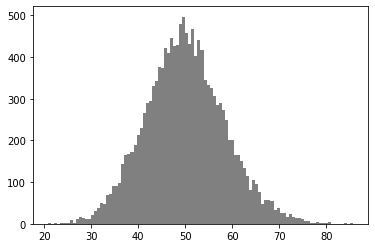

In [62]:
plt.hist(df.Total,bins=100,color='grey')

<AxesSubplot:xlabel='Total', ylabel='LogWage'>

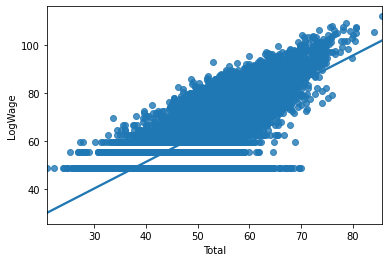

In [63]:
sns.regplot(data=df, x='Total', y='LogWage', fit_reg=True)

<AxesSubplot:>

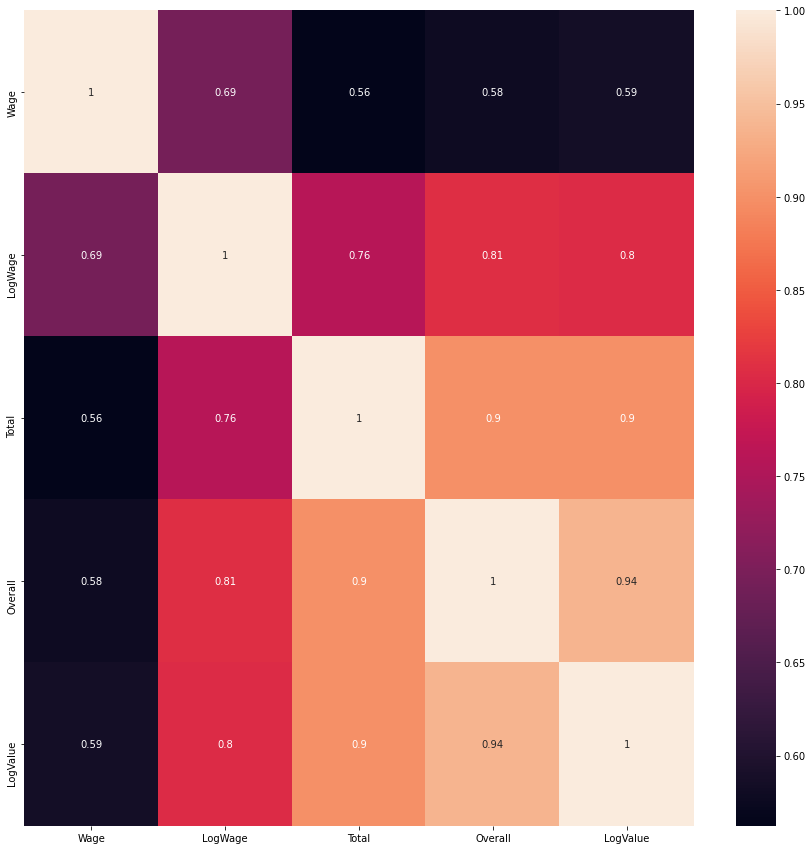

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['Wage', 'LogWage', 'Total', 'Overall', 
                'LogValue']].corr(), annot=True)

# 다들 좋다.

# Total로 합치니 상관계수가 훨씬 증가했다.

# LogValue의 가중치

- 지금 건드리진 말자.

<AxesSubplot:xlabel='LogValue', ylabel='LogWage'>

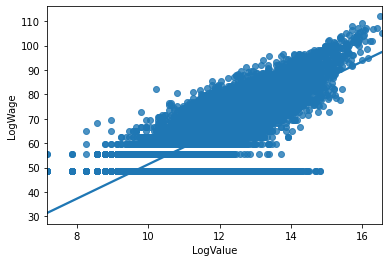

In [65]:
sns.regplot(data=df, x='LogValue', y='LogWage', fit_reg=True)

# 여기까지 봐서 진짜 필요없는 컬럼은 드랍.

In [66]:
df.columns

Index(['Wage', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Special',
       ...
       'ClubLogWageMedian', 'ClubWageMin', 'ClubLogWageMin', 'AgeWeight',
       'InternationalReputationWeight', 'RealFaceWeight',
       'PositionClassWeight', 'PositionClass1', 'LoanedFromWeight', 'Total'],
      dtype='object', length=102)

<AxesSubplot:>

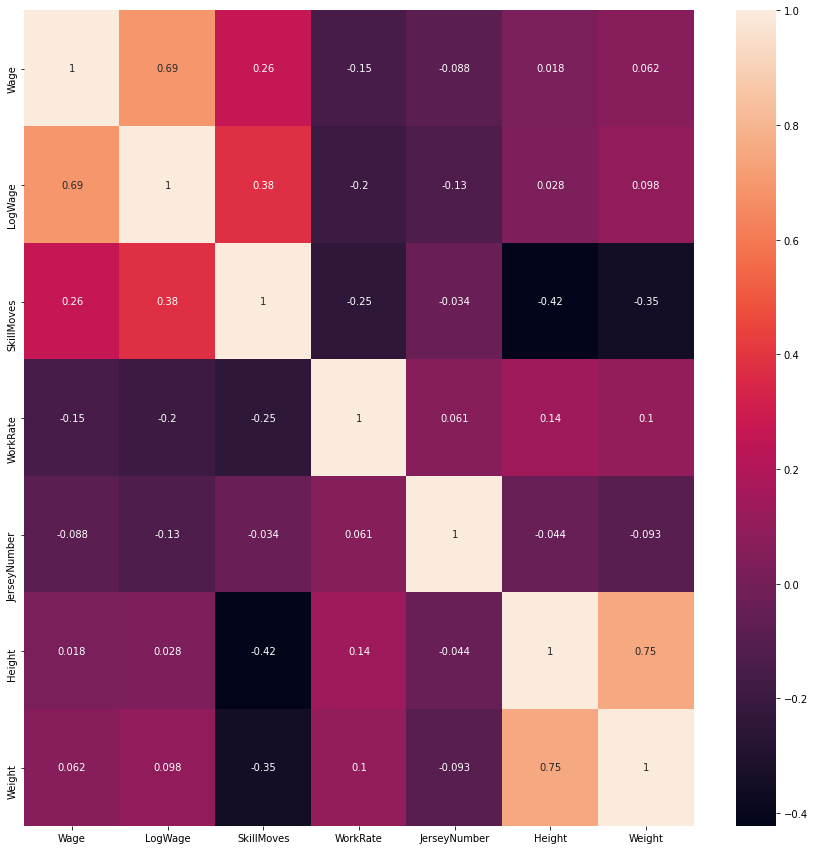

In [67]:
# 히트맵으로 알아보기
plt.figure(figsize=(15,15))
sns.heatmap(df[['Wage', 'LogWage', 'SkillMoves', 'WorkRate', 'BodyType', 
                'JerseyNumber','Height', 'Weight']].corr(), annot=True)

# 다 필요없다.

In [68]:
df.drop(['SkillMoves', 'WorkRate', 'BodyType', 'JerseyNumber','Height', 'Weight',
         'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
         'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
         'LB', 'LCB', 'CB', 'RCB', 'RB','Crossing', 'Finishing', 'HeadingAccuracy',
         'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
         'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
         'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
         'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
         'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
         'GKHandling', 'GKKicking', 'GKPositioning',
         'GKReflexes'],axis=1,inplace=True)
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,86.873762,82.851709,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,81.313155,72.292139,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,75.752549,70.532211,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,1,ST,"Sep 2, 2013",0,2022,75.752549,74.052067,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,1,LCM,"Jul 17, 2014",0,2022,80.201034,73.172103,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,39.624220,Atlético Huila,61750.0,1759,Left,1.0,3.0,0,LB,"Aug 7, 2018",0,2023,51.285881,44.133285,83330.0,11.030865,4.5,Defender,48.751973,146.250000,49.921318,130.0,48.751973,130.0,48.751973,1.292,1.00,1.00,1.07,1,1.0,45.666404
14320,130,228457,A. Dabasse,24,France,61,36.360048,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,0,ST,"Jul 1, 2015",0,2019,35.716183,49.413071,77090.0,10.651383,4.5,Foward,48.751973,198.421053,52.954184,130.0,48.751973,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.0,40.203927
14321,130,242534,C. Cásseres Jr,18,Venezuela,61,60.841341,New York Red Bulls,68250.0,1633,Right,1.0,3.0,0,CM,"Feb 2, 2018",0,2020,40.164668,53.812891,143000.0,11.130947,3.0,Medfielder,48.751973,429.000000,60.637852,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,2,1.0,50.431743
14322,130,236955,P. Tomczyk,20,Poland,58,37.992134,Lech Poznań,23400.0,1355,Right,1.0,2.0,0,ST,"Dec 17, 2016",0,2021,33.491940,35.333644,36270.0,10.060534,2.0,Foward,48.751973,448.500000,61.081359,390.0,59.687076,130.0,48.751973,1.146,1.00,1.00,1.13,3,1.0,35.372035


# 클럽 LogWage 곡선 제작

- 25, 50, 75, max로 계산

- 클럽의 가장 높은 LogWage를 전체의 최저 LogWage대비 몇 배인지 계산하여
- 클럽 LogWage 곡선으로 적용한다.

이 가중치는 다른 가중치를 더욱 배가 시켜준다.
예를 들어 강남에서 사는 사람에게 자동차가 있다면 그 자동차는

타지역보다 비싼 자동차일테니 다른 지역의 자동차들보다 강남가중치를
주는 것이 마땅하다는 생각에서 시작했다.

# !! 쉽게 새로운 컬럼 만드는 방법!!
- df['Multiple'] = 1

In [69]:
ClubWeight100 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight100'])
ClubWeight75 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight75'])
ClubWeight50 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight50'])
ClubWeight25 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight25'])

df = pd.concat([df,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25], axis=1)

In [70]:
for i in range(df.shape[0]):
    df.ClubWeight100[i] = df[df.Club==df.Club[i]].LogWage.describe()[7]/df.LogWage.min()
    df.ClubWeight75[i] = df[df.Club==df.Club[i]].LogWage.describe()[6]/df.LogWage.min()
    df.ClubWeight50[i] = df[df.Club==df.Club[i]].LogWage.describe()[5]/df.LogWage.min()
    df.ClubWeight25[i] = df[df.Club==df.Club[i]].LogWage.describe()[4]/df.LogWage.min()

In [71]:
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,86.873762,82.851709,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056,2.298240,2.090291,1.988824,1.622995
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,81.313155,72.292139,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693,2.237408,2.122623,1.991895,1.654479
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,75.752549,70.532211,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128,2.237408,2.122623,1.991895,1.654479
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,1,ST,"Sep 2, 2013",0,2022,75.752549,74.052067,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265,2.237408,2.122623,1.991895,1.654479
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,1,LCM,"Jul 17, 2014",0,2022,80.201034,73.172103,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783,2.237408,2.122623,1.991895,1.654479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,39.624220,Atlético Huila,61750.0,1759,Left,1.0,3.0,0,LB,"Aug 7, 2018",0,2023,51.285881,44.133285,83330.0,11.030865,4.5,Defender,48.751973,146.250000,49.921318,130.0,48.751973,130.0,48.751973,1.292,1.00,1.00,1.07,1,1.0,45.666404,1.141394,1.000000,1.000000,1.000000
14320,130,228457,A. Dabasse,24,France,61,36.360048,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,0,ST,"Jul 1, 2015",0,2019,35.716183,49.413071,77090.0,10.651383,4.5,Foward,48.751973,198.421053,52.954184,130.0,48.751973,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.0,40.203927,1.224301,1.141394,1.000000,1.000000
14321,130,242534,C. Cásseres Jr,18,Venezuela,61,60.841341,New York Red Bulls,68250.0,1633,Right,1.0,3.0,0,CM,"Feb 2, 2018",0,2020,40.164668,53.812891,143000.0,11.130947,3.0,Medfielder,48.751973,429.000000,60.637852,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,2,1.0,50.431743,1.425160,1.366217,1.141394,1.000000
14322,130,236955,P. Tomczyk,20,Poland,58,37.992134,Lech Poznań,23400.0,1355,Right,1.0,2.0,0,ST,"Dec 17, 2016",0,2021,33.491940,35.333644,36270.0,10.060534,2.0,Foward,48.751973,448.500000,61.081359,390.0,59.687076,130.0,48.751973,1.146,1.00,1.00,1.13,3,1.0,35.372035,1.449298,1.283179,1.224301,1.000000


In [72]:
df.to_pickle('./dataset/FIFA가중치.pkl')

In [73]:
끝

NameError: name '끝' is not defined